### Predicting cancer cells by a moving window and color-cooccurr matrix

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pickle
import os

IMAGE_FOLDER="F:\BSU_FAMCS\BMI\CourseProject\Datasets\ATiles"

def pickling_in(name):
    """Loading X from binary file "name".pickle"""
    pickle_in=open("{}.pickle".format(name),"rb")
    X=pickle.load(pickle_in)
    pickle_in.close()
    return X

def pickling_out(X,name):
    """Saving X in binary file "name".pickle"""
    pickle_out=open("{}.pickle".format(name),"wb")
    pickle.dump(X,pickle_out)
    pickle_out.close()

trainX=pickling_in(os.path.join(IMAGE_FOLDER,"trainX"))
trainY=pickling_in(os.path.join(IMAGE_FOLDER,"trainYbrown"))     
trainYblue=pickling_in(os.path.join(IMAGE_FOLDER,"trainYblue")) 

testX=pickling_in(os.path.join(IMAGE_FOLDER,"testX"))
testY=pickling_in(os.path.join(IMAGE_FOLDER,"testYbrown"))  
testYblue=pickling_in(os.path.join(IMAGE_FOLDER,"testYblue"))  

In [3]:
trainX[:,:,:,[0,1,2]]=trainX[:,:,:,[2,1,0]]


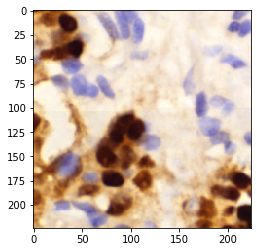

In [4]:
plt.imshow(trainX[3])

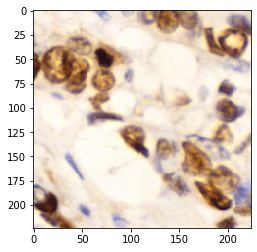

In [5]:
image1=trainX[7]
plt.imshow(image1)

#### Preparing data for training 

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [7]:
def make_gray(rgb):
    gray=rgb2gray(rgb)
    gray=gray*255
    gray=gray.astype("int")
    gray=reduction(gray)
    return gray

def reduction(gray):   
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            rest=gray[i,j]//5
            gray[i,j]=rest
    return gray         

(224, 224)


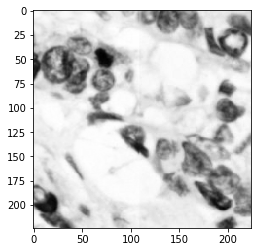

In [8]:
gray_image=rgb2gray(image1)*255
gray_image=gray_image.astype("int")

print(gray_image.shape)
plt.imshow(gray_image,cmap="gray")

0.2801872201872202
0.03436467236467237
0.052038258038258046
0.0066562019700834914
0.03628774928774929


C:\Python\lib\site-packages\ipykernel_launcher.py:107: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.


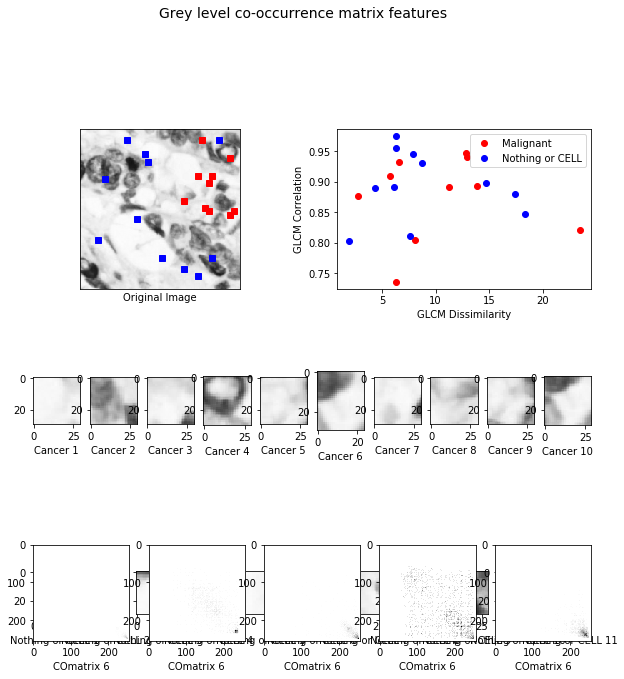

In [9]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

PATCH_SIZE = 30

# select some patches from grassy areas of the image
grass_locations = [(50,150),(0,155),(50,170),(25,195),(95,160),(100,200),(60,165),(85,130),(100,165),(105,195)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(gray_image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(180,130),(55,20),(110,65),(20,75),(165,100),(30,80),(140,10),(190,150),(165,170),(0,180),(0,50)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(gray_image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])
    
    
# create the figure
fig = plt.figure(figsize=(10, 10))


# compute some GLCM properties each patch
xs = []
ys = []
glcms=[]
dataX=[]
dataY=[]
for patch in (grass_patches):
    glcm = greycomatrix(patch, distances=[2,2,5,5,5,5,10,10], angles=[0,np.pi/2,0,np.pi/2,np.pi/6,np.pi/3,0,np.pi/2], levels=256, symmetric=True, normed=True)

    glcms.append(glcm)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    dataX.append([greycoprops(glcm, 'dissimilarity')[0, 0],greycoprops(glcm, 'correlation')[0, 0]])
    dataY.append(1)
    
for patch in (sky_patches):
    glcm = greycomatrix(patch, distances=[2,2,5,5,5,5,10,10], angles=[0,np.pi/2,0,np.pi/2,np.pi/6,np.pi/3,0,np.pi/2], levels=256,
                        symmetric=True, normed=True)
    glcms.append(glcm)
    #print(greycoprops(glcm, 'dissimilarity'))
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    dataX.append([greycoprops(glcm, 'dissimilarity')[0, 0],greycoprops(glcm, 'correlation')[0, 0]])
    dataY.append(0)


# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(gray_image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'rs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

#Normalizing!!!
#max_dissimilarity=max(xs)
#xs=xs/max_dissimilarity


# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'ro',
        label='Malignant')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Nothing or CELL')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cancer %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Nothing or CELL %d' % (i + 1))
    
for i, patch in enumerate(glcms[0:5]):
    ax = fig.add_subplot(3, len(glcms[0:5]), len(glcms[0:5])*2 + i + 1)
   
    temp=patch[:,:,0,0].reshape((256,256))
    for i in range(1,6):
        temp+=patch[:,:,i,i].reshape((256,256))
    temp=patch.max()-temp
    ax.imshow(temp, cmap=plt.cm.gray)
    ax.set_xlabel('COmatrix %d' % (i + 1))
    print(patch.max())
    


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# Fetching more data to train

In [10]:
raw_dataX=[]
raw_dataY=[]

50


(224, 224)

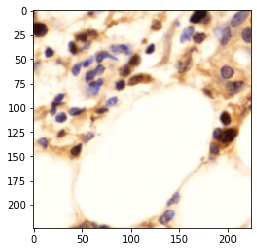

In [11]:
temp=trainX[17]
temp_gray=make_gray(temp)
plt.imshow(temp)
print(temp_gray.max())
temp_gray.shape

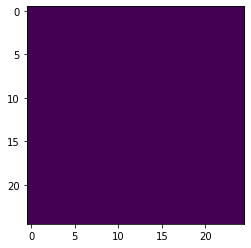

In [12]:
i=100
j=110
small=temp_gray[i:i+25,j:j+25]
plt.imshow(small)

In [ ]:
raw_dataX.append(small)
raw_dataY.append(0)

In [ ]:
print(len(raw_dataX))

In [ ]:
print(sum(raw_dataY))

In [ ]:
#REDUCTION
for i in range(len(raw_dataX)):
    raw_dataX[i]=reduction(raw_dataX[i])

### Training SVM by GLCM correlation and dissimilarity

In [ ]:
dataX

In [ ]:
dataY

In [ ]:
from sklearn import svm

classifierSVM=svm.SVC(C=20,kernel="linear")
classifierSVM.fit(dataX,dataY)

In [ ]:
classifierSVM.support_vectors_

In [ ]:
classifierSVM.support_

In [ ]:
classifierSVM.n_support_

In [ ]:
classifierSVM.predict([[35,0.8]])

#### Preparing and testing data

In [ ]:
test_image=trainX[4]
plt.imshow(test_image)

gray_test=rgb2gray(test_image)*255
gray_test=gray_test.astype("int")

print(gray_test.shape)
plt.imshow(test_image)

In [ ]:
import matplotlib.patches as patches
from tqdm import tqdm
PATCH_SIZE=30

figure, ax=plt.subplots(1)
ax.imshow(gray_test)
#Preparing and predicting
for i in (range(0,trainX[0].shape[0]-PATCH_SIZE,PATCH_SIZE)):
    for j in (range(0,trainX[0].shape[1]-PATCH_SIZE,PATCH_SIZE)):
        patch=gray_test[j:j+PATCH_SIZE,i:i+PATCH_SIZE]
        glcm = greycomatrix(patch, distances=[2,2,5,5,5,5,10,10], angles=[0,np.pi/2,0,np.pi/2,np.pi/6,np.pi/3,0,np.pi/2], levels=256, symmetric=True, normed=True)
        
        #Predicting
        prediction=classifierSVM.predict([[greycoprops(glcm, 'dissimilarity')[0, 0],greycoprops(glcm, 'correlation')[0, 0]]])
        
        #print(prediction)
        #print(patch)

        
        if prediction[0]==1:
            rect=patches.Rectangle((i,j),PATCH_SIZE,PATCH_SIZE,linewidth=1,edgecolor="red",facecolor="None")
            ax.add_patch(rect)

In [ ]:
mali=gray_test[90:120,0:30]
plt.imshow(mali)

In [ ]:
glcm = greycomatrix(mali, distances=[5,5,5,5,10,10], angles=[0,np.pi/2,np.pi/6,np.pi/3,0,np.pi/2], levels=256,symmetric=True, normed=True)
prediction=classifierSVM.predict([[greycoprops(glcm, 'dissimilarity')[0, 0],greycoprops(glcm, 'correlation')[0, 0]]])
prediction

In [ ]:
print([greycoprops(glcm, 'dissimilarity')[0, 0],greycoprops(glcm, 'correlation')[0, 0]])

### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

classifierLR=LogisticRegression().fit(dataX,dataY)

In [ ]:
PATCH_SIZE=20

figure, ax=plt.subplots(1)
ax.imshow(gray_test)

#Preparing and predicting
for i in (range(0,trainX[0].shape[0]-PATCH_SIZE,PATCH_SIZE)):
    for j in (range(0,trainX[0].shape[1]-PATCH_SIZE,PATCH_SIZE)):
        patch=gray_test[j:j+PATCH_SIZE,i:i+PATCH_SIZE]
        glcm = greycomatrix(patch, 
                            distances=[2,2,5,5,5,5,10,10],
                            angles=[0,np.pi/2,0,np.pi/2,np.pi/6,np.pi/3,0,np.pi/2], levels=256, symmetric=True, normed=True)
        
        #Predicting
        prediction=classifierLR.predict_proba([[greycoprops(glcm, 'dissimilarity')[0, 0],greycoprops(glcm, 'correlation')[0, 0]]])
        
        print(prediction)
        #print(patch)

        threshold=0.5
        if prediction[0][1]>threshold:
            rect=patches.Rectangle((i,j),PATCH_SIZE,PATCH_SIZE,linewidth=1,edgecolor="red",facecolor="None")
            ax.add_patch(rect)

## Working with a bigger dataset

In [ ]:
biggerDataX=[]
for im in raw_dataX:
    glcm = greycomatrix(im,
                        distances=[5,10], 
                        angles=[0,np.pi/2],
                        levels=51, symmetric=True, normed=True)
    a=greycoprops(glcm,"dissimilarity")[0,0]
    aa=greycoprops(glcm,"dissimilarity")[0,1]
    aaa=greycoprops(glcm,"dissimilarity")[1,0]

    b=greycoprops(glcm,"correlation")[0,0]
    bb=greycoprops(glcm,"correlation")[0,1]
    bbb=greycoprops(glcm,"correlation")[1,0]
    
    c=greycoprops(glcm,"homogeneity")[0,0]
    cc=greycoprops(glcm,"homogeneity")[0,1]
    ccc=greycoprops(glcm,"homogeneity")[1,0]
    
    print(greycoprops(glcm,"homogeneity"),"@@@@")

    
    biggerDataX.append([a,aa,aaa,b,bb,bbb,c,cc,ccc])
    

In [ ]:
len(biggerDataX)

## Logistic regression (Bigger DS)

In [ ]:
class2LR=LogisticRegression().fit(biggerDataX,raw_dataY)

In [ ]:
class2LR.score(biggerDataX,raw_dataY)

In [ ]:
test=trainX[4]
gray_test=make_gray(test)
plt.imshow(test)

In [ ]:
PATCH_SIZE=25
predicted_probabilities=[]
positions=[]

#Preparing and predicting
for i in tqdm(range(0,trainX[0].shape[0]-PATCH_SIZE+1,PATCH_SIZE-10)):
    for j in (range(0,trainX[0].shape[1]-PATCH_SIZE+1,PATCH_SIZE-10)):
        patch=gray_test[j:j+PATCH_SIZE,i:i+PATCH_SIZE]
        
        glcm = greycomatrix(patch,
                        distances=[5,10], 
                        angles=[0,np.pi/2],
                        levels=51, symmetric=True, normed=True)
        a=greycoprops(glcm,"dissimilarity")[0,0]
        aa=greycoprops(glcm,"dissimilarity")[0,1]
        aaa=greycoprops(glcm,"dissimilarity")[1,0]

        b=greycoprops(glcm,"correlation")[0,0]
        bb=greycoprops(glcm,"correlation")[0,1]
        bbb=greycoprops(glcm,"correlation")[1,0]
    
        c=greycoprops(glcm,"homogeneity")[0,0]
        cc=greycoprops(glcm,"homogeneity")[0,1]
        ccc=greycoprops(glcm,"homogeneity")[1,0]
    
        
        #Predicting
        prediction=class2LR.predict_proba([[a,aa,aaa,b,bb,bbb,c,cc,ccc]])
        predicted_probabilities.append(prediction[0][1])
        positions.append([i,j])
        #print(prediction)

In [ ]:
figure, ax=plt.subplots(1)
ax.imshow(gray_test,cmap="gray")
print("Max: ",gray_test.max())

counter=0
threshold=0.9
for i,prob in enumerate(predicted_probabilities):
    if prob>threshold:
        counter+=1
        rect=patches.Rectangle(tuple(positions[i]),PATCH_SIZE,PATCH_SIZE,linewidth=1,edgecolor="red",facecolor="None")
        ax.add_patch(rect)
print("Total: ",counter)        

In [ ]:
plt.imshow(trainX[15])
trainX[15].shape